In [109]:
import sys
import json
from os import listdir
from itertools import product
import importlib
import matplotlib.pyplot as plt
import numpy as np

import input_output
importlib.reload(input_output)
import inheritance_states
importlib.reload(inheritance_states)
import transition_matrices
importlib.reload(transition_matrices)
import genotypes
importlib.reload(genotypes)
import losses
importlib.reload(losses)
import viterbi
importlib.reload(viterbi)

<module 'viterbi' from '/Users/kelley/Projects/PhasingFamilies/phase/viterbi.py'>

In [119]:
# Read in command line arguments
chrom = '10'
#ped_file = '../../DATA/platinum/platinum6.ped'
#ped_file = '../data/Ancestry Data Files/AncestryDNA.ped'
#ped_file = '../data/spark.ped.quads.ped'
#ped_file = '../data/spark.ped'
#
#data_dir = '../split_gen_ancestry'
#param_file = '../parameter_estimation/params/ancestry_params_ext.json'
#data_dir = '../split_gen_spark'
#param_file = '../parameter_estimation/params/spark_params_ext.json'
#detect_denovos = False

#data_dir = '../../DATA/spark/genotypes'
#param_file = '../params/spark_params.json'
#ped_file = '../../DATA/spark/spark.ped'
#detect_denovos = False
#detect_deletions = True
#num_loss_regions = 1

#data_dir = '../../DATA/platinum/genotypes'
#param_file = '../params/platinum_params.json'
#ped_file = '../../DATA/platinum/platinum6.ped'
#detect_denovos = False
#detect_deletions = True
#num_loss_regions = 2

#data_dir = '../../DATA/ihart.ms2/genotypes'
#param_file = '../params/ihart.ms2_params.json'
#ped_file = '../../DATA/ihart.ms2/ihart.ped'
#detect_deletions = True
#detect_duplications = False
#num_loss_regions = 2

data_dir = '../../DATA/ihart.ms2/genotypes'
param_file = '../params/ihart.ms2_quads_params.json'
ped_file = '../../DATA/ihart.ms2/ihart.ped.quads.ped'
detect_deletions = True
detect_duplications = False
num_loss_regions = 2



#data_dir = '../../DATA/spark.exome/genotypes'
#param_file = '../params/spark.exome_quads_missing_parent_params.json'
#ped_file = '../../DATA/spark.exome/spark.ped.quads.ped'
#detect_deletions = False
#detect_duplications = False
#detect_haplotypes = False
#num_loss_regions = 2

#data_dir = '../../DATA/ssc/genotypes'
#param_file = '../params/ssc_params.json'
#ped_file = '../../DATA/ssc/ssc.ped'
#detect_deletions = True
#detect_duplications = False
#num_loss_regions = 2
#detect_consanguinity = False

#data_dir = '../../DATA/mssng/genotypes'
#param_file = '../params/mssng_params.json'
#ped_file = '../../DATA/mssng/mssng.ped'
#detect_denovos = False
#detect_deletions = True
#detect_duplications = False
#num_loss_regions = 2

#data_dir = '../split_gen_ihart_23andme'
#param_file = '../parameter_estimation/23andme_params.json'

#data_dir = '../split_gen_ihart_chip'
#param_file = '../parameter_estimation/ihart_chip_params.json'

batch_size = None
batch_num = None
batch_offset = None

# set up filenames
sample_file = '%s/chr.%s.gen.samples.txt' % (data_dir, chrom)
coord_file = '%s/chr.%s.gen.coordinates.npy' % (data_dir,  chrom)
gen_files = sorted([f for f in listdir(data_dir) if ('chr.%s.' % chrom) in f and 'gen.npz' in f])

with open('%s/info.json' % data_dir, 'r') as f:
    assembly = json.load(f)['assembly']
    
if param_file is not None:
    with open(param_file, 'r') as f:
        params = json.load(f)
else:
    params = estimate_parameters.error_parameters(data_dir, ped_file, chrom)

In [120]:
# pull families of interest
families = input_output.pull_families(ped_file, data_dir)

families pulled 2391


In [198]:
import random

# ('AU3912', 'AU3912202', 'AU3912201')

# ()'AU1453', 'AU1453202', 'AU1453201')
#fkey = ('AU1047', 'AU1047212', 'AU1047211')
#fkey = ('AU4093', 'AU4093202', 'AU4093201')
#fkey = ('AU2757', 'AU2757202', 'AU2757201')
#fkey = ('AU0808', 'AU080801', 'AU080802')
#fkey = [k[0] for k in families_of_this_size if 'SF0010543' in k[0]][0]
#fkey = ('AU0356', 'AU035601', 'AU035602')
#fkey = ('AU1314', 'AU1314202', 'AU1314201')
#fkey = ('AU1388', 'AU1388202', 'AU1388201')
#fkey = ('AU2125', 'AU2125202', 'AU2125201')
#fkey = ('11002', '11002.mo', '11002.fa')

#fkey = ('SF0000027.SP0000034.SP0000063', 'SP0000051', 'SP0000241')
#inds = [k[1] for k in families_of_this_size if k[0]==fkey][0]

family = random.choice([x for x in families if len(x)==4])
#family = [x for x in families if x.id=='AU0206.AU020603.AU020605'][0]
m = len(family)
print('family', family, m)

family AU1356.AU1356301.AU1356304 4


In [199]:
print(family.individuals)

['AU1356202', 'AU1356201', 'AU1356301', 'AU1356304']


In [200]:
# if we're modeling parental consanguinity, we can only work with nuclear families 
if detect_consanguinity:
    assert family.num_ancestors()==2
    assert len(family.ordered_couples)==1

    family.add_child(family.mat_ancestors[0], 'mat_shared_ancestor', 'pat_shared_ancestor')
    family.add_child(family.pat_ancestors[0], 'mat_shared_ancestor', 'pat_shared_ancestor')


In [201]:
importlib.reload(transition_matrices)
importlib.reload(inheritance_states)

# create inheritance states
states = inheritance_states.InheritanceStates(family, detect_deletions, detect_duplications, num_loss_regions)

# create transition matrix
transitions = transition_matrices.TransitionMatrix(states, params)


inherited del options 16
fixed [('AU1356301', 'mat'), ('AU1356301', 'pat')]
mat phase options 2
pat phase options 2
mat denovo del options 1
pat denovo del options 1
loss options 2
inheritance states 128
transitions (128, 8)


In [202]:
importlib.reload(losses)
import losses

# create loss function
loss = losses.LazyLoss(states, family, params, num_loss_regions)

#indices = [x[6]==1 and x[7]==1 for x in loss.loss_states]
#print(np.sum(indices)/len(indices))
#loss.losses[indices, :] += 0.001

#for s, l1, l2, l3, l4 in zip(states, loss((0,)*m), loss((-1,)*m), loss((-2,)*m), loss((1, 0, 1, 1, 0))):
#    print(s, l1, l2, l3, l4)

#l = loss((1, 0, 1, 1, 0))
#for s in loss.loss_states:
#    s = np.asarray(s)
#    i = states.index(tuple(s))
#    if np.any(s[:4] == 2):
#        new_state = s.copy()
#        new_state[s==2] = 1
#        state_index = states.index(tuple(new_state))
#        if l[i] != l[state_index]:
#            print(s, new_state, l[i], l[state_index])
        #print(sorted(set(loss.perfect_match_indices[loss.loss_state_to_index[tuple(s)]])))
        #print(sorted(set(loss.perfect_match_indices[loss.loss_state_to_index[tuple(new_state)]])))
#print(loss((1, 2, 1, 0)))
#print(loss.get_parental_variants((1, 1, 1, 1, 1, 0, 1, 1, 1, 0), (1, 2, 1, 0, 1)))
#print(loss.get_parental_variants((1, 1, 1, 1, 1, 0, 1, 1, 1, 0), (2, 1, 2, 1, 2)))

no data []
AU1356202
	0/0	0/1	1/1	./.
0/0	0.0001-0.0022	4.5853-3.1165	6.1477-3.5183	3.8261-2.3880
0/1	2.6170-1.5121	0.0018-0.0246	2.8411-1.7630	3.7150-2.1542
1/1	4.7940-2.7992	3.2746-2.0213	0.0004-0.0073	3.5016-2.2606
-/0	0.0001-0.0022	4.5853-3.1165	6.1477-3.5183	3.8261-2.3880
-/1	4.7940-2.7992	3.2746-2.0213	0.0004-0.0073	3.5016-2.2606
-/-	3.2746-2.0213	5.4708-3.1588	4.5853-3.1165	0.0002-0.0048
AU1356201
	0/0	0/1	1/1	./.
0/0	0.0001-0.0022	4.5853-3.1165	6.1477-3.5183	3.8261-2.3880
0/1	2.6170-1.5121	0.0018-0.0246	2.8411-1.7630	3.7150-2.1542
1/1	4.7940-2.7992	3.2746-2.0213	0.0004-0.0073	3.5016-2.2606
-/0	0.0001-0.0022	4.5853-3.1165	6.1477-3.5183	3.8261-2.3880
-/1	4.7940-2.7992	3.2746-2.0213	0.0004-0.0073	3.5016-2.2606
-/-	3.2746-2.0213	5.4708-3.1588	4.5853-3.1165	0.0002-0.0048
AU1356301
	0/0	0/1	1/1	./.
0/0	0.0001-0.0020	4.6749-3.1418	6.0991-3.5141	3.8818-2.4413
0/1	2.6119-1.5200	0.0019-0.0243	2.7896-1.7762	3.6923-2.1285
1/1	4.7337-2.6858	3.3013-2.0531	0.0004-0.0072	3.4938-2.2575
-/0	0.00

In [203]:
# pull genotype data for this family
family_genotypes, family_snp_positions, mult_factor = input_output.pull_gen_data_for_individuals(data_dir, assembly, chrom, family.individuals)
loss.set_cache(family_genotypes)
print('Data pulled')

genotypes pulled (4, 457106)
cached losses (128, 125) already_calculated 0
losses (128, 125) 0.128 MB
Data pulled


In [204]:
importlib.reload(viterbi)

# forward sweep
v_cost = viterbi.viterbi_forward_sweep(family_genotypes, family_snp_positions, mult_factor, states, transitions, loss)




v_cost (128, 457106) 468.076544 MB
transition_matrix (128, 8)
Forward sweep complete 29.475376844406128 sec


In [205]:
importlib.reload(viterbi)

# backward sweep
final_states = viterbi.viterbi_backward_sweep(v_cost, states, transitions)


final_states (13, 457106) 5.942378 MB
Num solutions (1,) 4632.6404544512
Num forks 417
Backward sweep complete 49.941405057907104 sec


In [206]:
#importlib.reload(viterbi)#
#
#v_path_new, v_cost_new = viterbi.viterbi_forward_sweep_low_memory(family_genotypes, family_snp_positions, mult_factor, states, transitions, loss)


In [207]:
#importlib.reload(viterbi)
#
## backward sweep
#final_states_new = viterbi.viterbi_backward_sweep_low_memory(v_path_new, v_cost_new, states, transitions)


In [208]:
#print(np.sum(np.all(final_states==final_states_new, axis=0)))
#print(np.sum(~np.all(final_states==final_states_new, axis=0)))


In [209]:
#print(final_states[:, -1])
#print(final_states_new[:, -1])

In [210]:
print(family.individuals)
print(np.max(final_states))
print(final_states.shape)

['AU1356202', 'AU1356201', 'AU1356301', 'AU1356304']
3
(13, 457106)


In [211]:
print(states[0])
print(states.get_maternal_recombination_neighbors(states[0]))
print(final_states[:, 0])

((0, 0, 0, 0), (1, 1, 1, 1), (1, 1, 1, 1), (None, None, 0, 0), (None, None, 0, 0), 0)
{4}
[1 1 1 1 0 1 2 3 0 2 0 3 0]


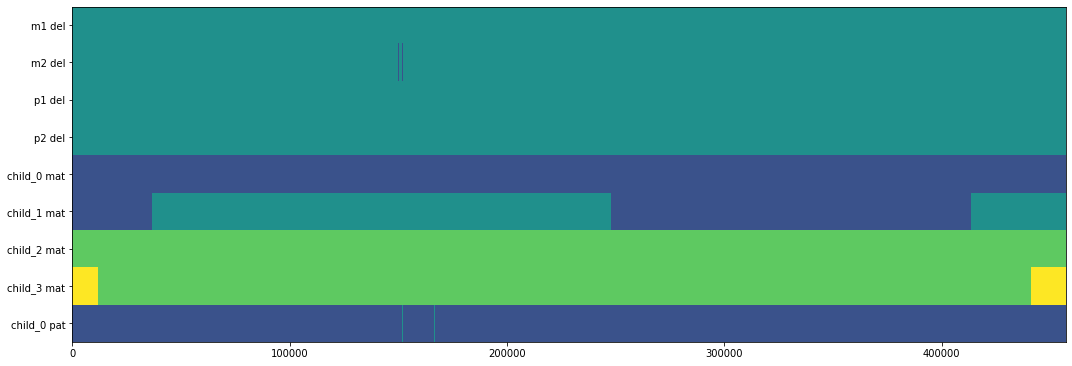

In [212]:
m = len(family)
final_states_greyed = final_states.copy()
final_states_greyed[:, final_states[-1, :]!=0] = -1

plt.figure(figsize=(15, 10))
ax = plt.subplot(2, 1, 1)
plt.imshow(final_states[[0, 1, 2, 3] + \
                               np.arange(8, 4+(2*m), 2).tolist() + \
                               np.arange(9, 4+(2*m), 2).tolist() + [-1], :],
           aspect='auto', vmin=-1, vmax=3)
plt.yticks(np.arange(1+2*m), 
           ['m1 del', 'm2 del', 'p1 del', 'p2 del'] + ['child_%d mat' % i for i in range(m)] + ['child_%d pat' % i for i in range(m)] + ['is_hts'])

#ax = plt.subplot(2, 1, 2)
#plt.imshow(final_states[np.arange(4+(2*m), 4+(4*m)).tolist(), :], aspect='auto', vmin=-1, vmax=3)


#final_states_greyed_new = final_states_new.copy()
#final_states_greyed_new[:, final_states_new[-1, :]!=0] = -1#
#
#ax = plt.subplot(2, 1, 2)
#plt.imshow(final_states_new[[0, 1, 2, 3] + \
#                               np.arange(8, 4+(2*m), 2).tolist() + \
#                               np.arange(9, 4+(2*m), 2).tolist() + [-1], :],
#           aspect='auto', vmin=-1, vmax=3)
#plt.yticks(np.arange(final_states.shape[0]-4), 
#           ['m1 del', 'm2 del', 'p1 del', 'p2 del'] + ['child_%d mat' % i for i in range(1, m-1)] + ['child_%d pat' % i for i in range(1, m-1)] + ['is_hts'])

#plt.subplot(2, 1, 2, sharex=ax)
#plt.fill_between(np.arange(family_snp_positions.shape[0]), 0, (family_snp_positions[:, 0]>=0) & (family_snp_positions[:, 1]<=20500000), alpha=0.5)
#plt.fill_between(np.arange(family_snp_positions.shape[0]), 0, (family_snp_positions[:, 0]>=9600000) & (family_snp_positions[:, 1]<=16300000))
#plt.fill_between(np.arange(family_snp_positions.shape[0]), 0, (family_snp_positions[:, 1]<=9600000) | (family_snp_positions[:, 0]>=48200000))

#plt.xticks(xticks, xlabels, rotation=90)

#plt.subplot(3, 1, 3)
#plt.plot(np.log2(family_snp_positions[:, 1]-family_snp_positions[:, 0]), marker='.', linestyle='')
#plt.plot(c[1:]-c[:-1], marker='.', linestyle='')
#plt.plot(num_non_mend, marker='.', linestyle='')
#plt.plot(np.convolve(num_non_mend, np.ones((100,)), mode='same'))
#plt.plot(np.convolve(num_missing, np.ones((100,)), mode='same'))
#plt.scatter(family_snp_positions[:, 0], final_states[-1, :], marker='.')
#plt.xticks(family_snp_positions[xticks, 0], xlabels, rotation=90)
#for i in np.where(family_snp_positions[:, 1]-family_snp_positions[:, 0] > 10000)[0]:
#    plt.plot([family_snp_positions[i, 0], family_snp_positions[i, 1]], [final_states[-1, i], final_states[-1, i]], color='grey')
#    #print(family_snp_positions[i, :])

#start_pos, end_pos = 3292640, 3293187
#plt.xlim(np.searchsorted(family_snp_positions[:, 0], [start_pos-1000000, end_pos+1000000]))
plt.tight_layout()
plt.show()

In [213]:
sample_id_to_sex = input_output.pull_sex(ped_file)

print([sample_id_to_sex[x] for x in family.individuals[2:]])


['1', '2']


In [214]:
is_hts = final_states[-1, :]==1

has_m1_deletion = final_states[0, :]==0
has_m2_deletion = final_states[1, :]==0
has_p1_deletion = final_states[2, :]==0
has_p2_deletion = final_states[3, :]==0

m1_is_inherited = np.sum(final_states[np.arange(8, 4+(2*m), 2).tolist() + np.arange(9, 4+(2*m), 2).tolist(), :]==0, axis=0)>0
m2_is_inherited = np.sum(final_states[np.arange(8, 4+(2*m), 2).tolist() + np.arange(9, 4+(2*m), 2).tolist(), :]==1, axis=0)>0
p1_is_inherited = np.sum(final_states[np.arange(8, 4+(2*m), 2).tolist() + np.arange(9, 4+(2*m), 2).tolist(), :]==2, axis=0)>0
p2_is_inherited = np.sum(final_states[np.arange(8, 4+(2*m), 2).tolist() + np.arange(9, 4+(2*m), 2).tolist(), :]==3, axis=0)>0

print('hard to sequence', np.sum(mult_factor * is_hts)/np.sum(mult_factor))     

print('m1 deletion', np.sum(mult_factor * (has_m1_deletion & ~is_hts))/np.sum(mult_factor))
print('m2 deletion', np.sum(mult_factor * (has_m2_deletion & ~is_hts))/np.sum(mult_factor))
print('p1 deletion', np.sum(mult_factor * (has_p1_deletion & ~is_hts))/np.sum(mult_factor))
print('p2 deletion', np.sum(mult_factor * (has_p2_deletion & ~is_hts))/np.sum(mult_factor))

#has_denovo = np.any(final_states[np.arange(4+(2*m), 4+(4*m)), :]==0, axis=0)
#print('has de novo', np.sum(has_denovo))

## maternal UPD
#print('maternal UPD', np.sum(mult_factor * ((has_upd[0, :] | has_upd[1, :]) & ~is_hts)))
#print('paternal UPD', np.sum(mult_factor * ((has_upd[2, :] | has_upd[3, :]) & ~is_hts)))#
#
#for i in range(m-2):
#    print('child%d mat upd' % (i+1), np.sum(mult_factor * (has_upd[4+2*i, :] & ~is_hts)))
#    print('child%d pat upd' % (i+1), np.sum(mult_factor * (has_upd[5+2*i, :] & ~is_hts)))


hard to sequence 0.0030401169744407
m1 deletion 0.00017475622308513674
m2 deletion 0.0009767109275547275
p1 deletion 0.0002125933502852214
p2 deletion 0.0


In [215]:
event = has_m1_deletion
#event = has_upd[6, :]
del_start = np.where(~event[:-1] & event[1:])[0]+1
del_end = np.where(event[:-1] & ~event[1:])[0]+1

print(len(del_start), len(del_end))
print(del_start, del_end)

# remove events in hard to sequence regions
event_is_hts = np.ones((del_start.shape[0],), dtype=bool)
for i, (s, e) in enumerate(zip(del_start, del_end)):
    event_is_hts[i] = np.all(is_hts[s:e])
print('hard to seq', np.sum(event_is_hts))

# remove events that aren't inherited
#event_is_inherited = np.ones((del_start.shape[0],), dtype=bool)
#for i, (s, e) in enumerate(zip(del_start, del_end)):
#    event_is_inherited[i] = np.any(event_inherited[s:e])
#print('not inherited', np.sum(~event_is_inherited))
    
#del_start = np.array(del_start)[~event_is_hts & event_is_inherited]
#del_end = np.array(del_end)[~event_is_hts & event_is_inherited]
#print(len(del_start), len(del_end))

print(del_start, del_end)

5 5
[148547 168754 317323 401121 445898] [148608 168793 317330 401128 445913]
hard to seq 0
[148547 168754 317323 401121 445898] [148608 168793 317330 401128 445913]


47182939 47198547 15608


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10


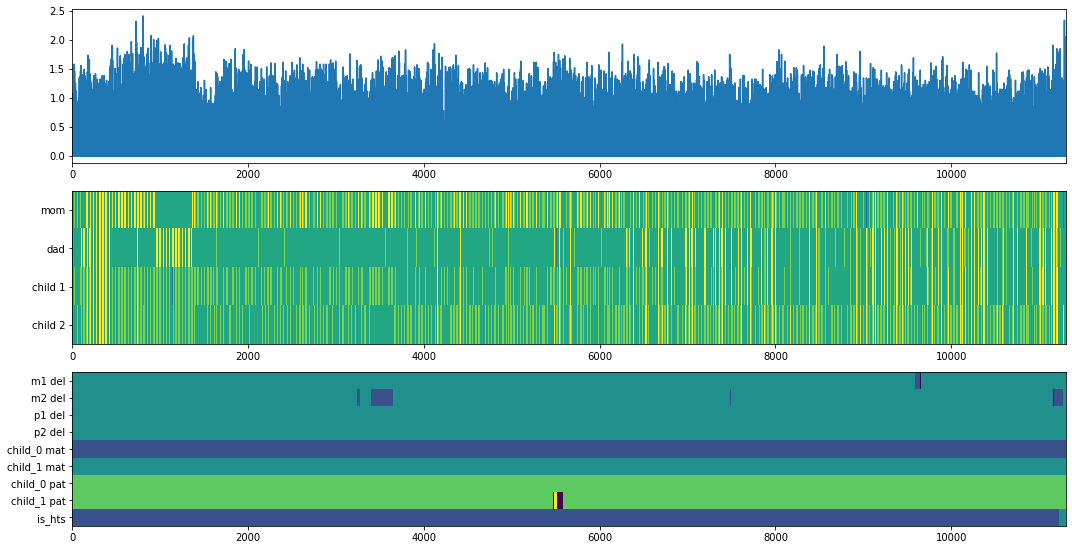

In [216]:
#dstart, dend = random.choice(list(zip(del_start, del_end)))
print(family_snp_positions[dstart, 0], family_snp_positions[dend, 1], family_snp_positions[dend, 1]-family_snp_positions[dstart, 0])
#start, end = max(0, dstart-100), min(dend+100, family_genotypes.shape[1])

#print(final_states[:, start])
#print(dstart, dend)
#print(family_snp_positions[dstart, :], family_snp_positions[dend, :])

start, end = 37556380, 39567416
start, end = np.where(family_snp_positions[:, 0]>=start)[0][0], np.where(family_snp_positions[:, 0]<=end)[0][-1]
start, end = max(0, start-100), min(end+100, family_genotypes.shape[1])

state_indices_of_interest = []

plt.figure(figsize=(15, 10))
ax = plt.subplot(4, 1, 1)
plt.plot(np.log10(mult_factor[start:end]))
homref = np.all(family_genotypes[:, start:end]==0, axis=0)
#plt.plot(np.where(~homref)[0], loss.alt_costs[family_genotypes[-1, start:end]][~homref])
#plt.plot(np.where(homref)[0], loss.alt_costs[family_genotypes[-1, start:end]][homref])
#plt.ylim([0, 10])

plt.subplot(4, 1, 2, sharex=ax)
plt.imshow(family_genotypes[:, start:end], aspect='auto', vmin=-3, vmax=2)
plt.yticks(np.arange(m), ['mom', 'dad'] + ['child %d' % i for i in range(1, m-1)])

plt.subplot(4, 1, 3, sharex=ax)
plt.imshow(final_states[[0, 1, 2, 3] + \
                               np.arange(8, 4+(2*m), 2).tolist() + \
                               np.arange(9, 4+(2*m), 2).tolist() + [-1], start:end],
           aspect='auto', vmin=-1, vmax=3)
plt.yticks(np.arange(1+2*m), 
           ['m1 del', 'm2 del', 'p1 del', 'p2 del'] + ['child_%d mat' % i for i in range(m-2)] + ['child_%d pat' % i for i in range(m-2)] + ['is_hts'])

#ax = plt.subplot(4, 1, 4)
#plt.imshow(final_states[np.arange(4+(2*m), 4+(4*m)).tolist(), start:end], aspect='auto', vmin=-1, vmax=3)

#plt.subplot(4, 1, 4, sharex=ax)
#plt.imshow(final_states[np.arange(16, 20).tolist(), start:end],
#           aspect='auto', vmin=-1, vmax=3)
#plt.yticks(np.arange(4), 
#           ['child1 mat', 'child1 pat', 'child2 mat', 'child2 pat'])

#plt.subplot(4, 1, 4, sharex=ax)
#plt.plot([loss(tuple(family_genotypes[:, j]))[states.index(tuple(np.clip(final_states[:, j], 0, None)))] for j in range(start, end)], alpha=0.5)

#plt.subplot(5, 1, 5, sharex=ax)
#plt.plot([loss(tuple(family_genotypes[:, j]))[states.index(tuple(np.clip(final_states[:, j], 0, None)))] for j in range(start, end)], alpha=0.5)
#plt.plot([loss(tuple(family_genotypes[:, j]))[states.index(tuple(np.hstack((np.clip(final_states[:2*m, j], 0, None), [0,]*(2*(m-2)), [np.clip(final_states[-1, j], 0, None)]))))] for j in range(start, end)], alpha=0.5)
#plt.plot([loss(tuple(family_genotypes[:, j]))[states.index(tuple(np.hstack(([1,]*4, np.clip(final_states[4:, j], 0, None)))))] for j in range(start, end)], alpha=0.5)
#plt.plot([loss(tuple(family_genotypes[:, j]))[states.index((1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0))] for j in range(start, end)], alpha=0.5)
#plt.plot(np.cumsum([loss(tuple(family_genotypes[:, j]))[states.index((1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0))] for j in range(start, end)]), alpha=0.5)
#plt.plot(np.cumsum([loss(tuple(family_genotypes[:, j]))[states.index((1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0))] for j in range(start, end)]), alpha=0.5)
#plt.plot([loss(tuple(family_genotypes[:, j]))[states.index((1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0))] for j in range(start, end+1)], alpha=0.5)
#plt.plot([loss(tuple(family_genotypes[:, j]))[states.index((0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0))] for j in range(start, end+1)], alpha=0.5)



plt.tight_layout()
plt.show()

In [217]:
g = family_genotypes[:, start:end]
mf = mult_factor[start:end]
print(g[:, mf>4])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [218]:
print(loss(np.zeros((m,))))

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0.]


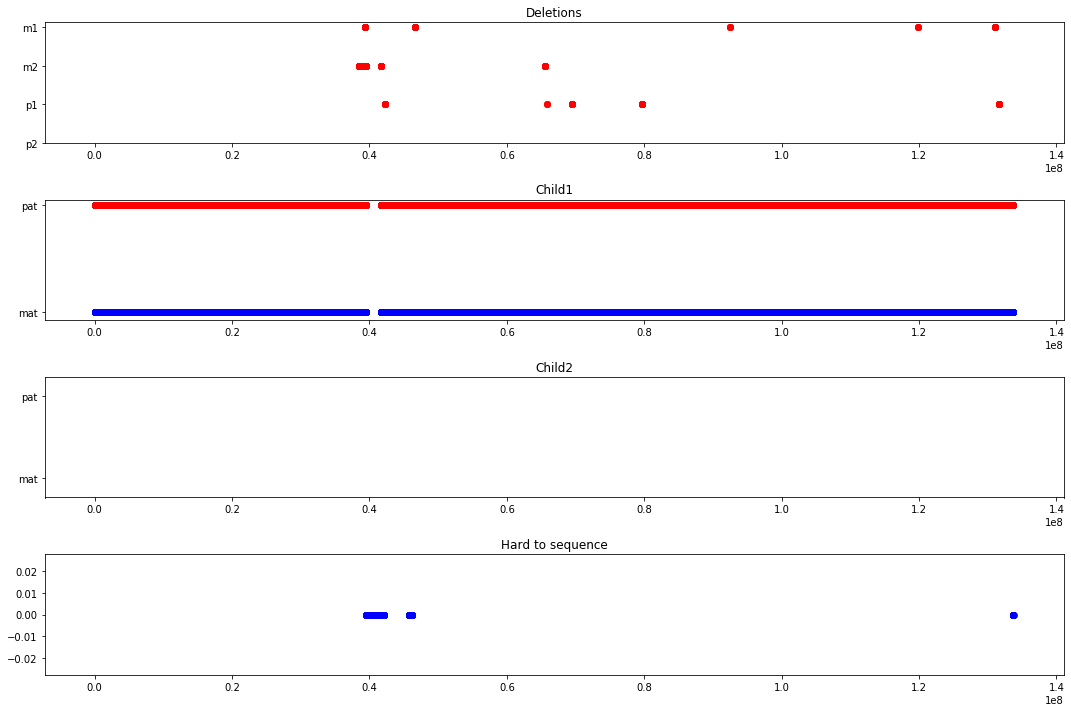

In [219]:
plt.figure(figsize=(15, 10))

ax = plt.subplot(m, 1, 1)

for i in range(4):
    #plt.scatter(family_snp_positions[final_states_greyed[i, :] == -1, 0], np.repeat(3-i, np.sum(final_states_greyed[i, :] == -1)), color='blue', alpha=0.5)
    plt.scatter(family_snp_positions[final_states_greyed[i, :] == 0, 0], np.repeat(3-i, np.sum(final_states_greyed[i, :] == 0)), color='red', alpha=0.5)
plt.title('Deletions')
plt.yticks(range(3, -1, -1), ['m1', 'm2', 'p1', 'p2'])

for i in range(0, m-2):
    plt.subplot(m, 1, i+2, sharex=ax)
    indices = (final_states_greyed[4+(2*i), :] == 0) & (final_states_greyed[-1, :] == 0)
    plt.scatter(family_snp_positions[indices, 0], np.repeat(0, np.sum(indices)), color='blue', alpha=0.5)
    indices = (final_states_greyed[4+(2*i), :] == 1) & (final_states_greyed[-1, :] == 0)
    plt.scatter(family_snp_positions[indices, 0], np.repeat(0, np.sum(indices)), color='red', alpha=0.5)

    indices = (final_states_greyed[5+(2*i), :] == 0) & (final_states_greyed[-1, :] == 0)
    plt.scatter(family_snp_positions[indices, 0], np.repeat(1, np.sum(indices)), color='blue', alpha=0.5)
    indices = (final_states_greyed[5+(2*i), :] == 1) & (final_states_greyed[-1, :] == 0)
    plt.scatter(family_snp_positions[indices, 0], np.repeat(1, np.sum(indices)), color='red', alpha=0.5)

    plt.title('Child%d' % (i+1))
    plt.yticks(range(0, 2), ['mat', 'pat'])

plt.subplot(m, 1, m, sharex=ax)
plt.scatter(family_snp_positions[final_states_greyed[-1, :] == -1, 0], np.repeat(0, np.sum(final_states_greyed[-1, :] == -1)), color='blue', alpha=0.5)
plt.scatter(family_snp_positions[final_states_greyed[-1, :] == 1, 0], np.repeat(0, np.sum(final_states_greyed[-1, :] == 1)), color='red', alpha=0.5)
plt.title('Hard to sequence')

plt.tight_layout()
plt.show()



In [ ]:
print(family_snp_positions[start, :], family_snp_positions[end, :])

In [ ]:
import numpy as np
def estimate_parental_variants(final_states, family_genotypes):
    m, n = family_genotypes.shape
    parental_variants, cost, blame = -np.ones((4, n), dtype=np.int8), -np.ones((n,), dtype=int), -np.ones((m, n), dtype=float)
    has_missing = 0
    for i in range(n):
        state, gen = final_states[:, i], tuple(family_genotypes[:, i])
        
        missing_indices = [i for i, x in enumerate(state) if x==-1]
        
        if len(missing_indices) == 0:
            pv, v, b = loss.get_parental_variants(tuple(state), gen)
            parental_variants[:, i] = pv
            cost[i] = v
            blame[:, i] = b
        else:
            has_missing += 1
            all_possible_states = np.tile(state, (pow(2, len(missing_indices)), 1))
            all_possible_states[:, missing_indices] = list(product(*[[0, 1]]*len(missing_indices)))

            min_v = None
            all_pvs, all_bs = [], []
            for s in all_possible_states:
                pv, v, b = loss.get_parental_variants(tuple(s), gen)
                if min_v is None or v < min_v:
                    min_v = v
                    all_pvs, all_bs = [pv], [b]
                elif v == min_v:
                    all_pvs.append(pv)
                    all_bs.append(b)

            all_pvs, all_bs = np.asarray(all_pvs), np.asarray(all_bs)
            parental_variants[np.all(all_pvs==-2, axis=0), i] = -2
            parental_variants[np.all(all_pvs==0, axis=0), i] = 0
            parental_variants[np.all(all_pvs==1, axis=0), i] = 1
            cost[i] = min_v
            
            all_bs = np.sum(all_bs, axis=0)
            if min_v == 0:
                blame[:, i] = 0
            else:
                blame[:, i] = min_v*all_bs/np.sum(all_bs)
            
        if i%10000==0:
            print(i, has_missing)
    return parental_variants, cost, blame

parental_variants, cost, blame = estimate_parental_variants(states, family_genotypes)       

In [ ]:
import time
import numpy as np
from itertools import product

def mask_states(family_genotypes, mult_factor, final_states, inheritance_states, loss, error_rate=0.001, smooth=5000):

	masked_final_states = np.copy(final_states)
	# Now, do masking
	prev_time = time.time()
	m, n = family_genotypes.shape
	p, state_len = inheritance_states.p, inheritance_states.state_len

	fit = -np.ones((n,), dtype=int)
	prev_state = None
	prev_state_indices = None
	for j in range(n): 
		pos_gen = tuple(family_genotypes[:, j])
		current_state = tuple(final_states[:, j])

		if current_state != prev_state:
			prev_state = current_state
			num_unknowns = len([x for x in current_state if x == -1])
			if num_unknowns>0:
				prev_state_indices = []
				for poss_itr in [iter(x) for x in product(*([[0, 1]]*num_unknowns))]:
					poss_state = tuple([x if x != -1 else next(poss_itr) for x in current_state])
					prev_state_indices.append(inheritance_states.index(poss_state))
			else:
				prev_state_indices = [inheritance_states.index(tuple(final_states[:, j]))]

		fit[j] = mult_factor[j]*(np.min(loss(pos_gen)[prev_state_indices])==1)
        
	print(np.unique(fit, return_counts=True))


	c = np.convolve(fit/m, np.ones(smooth,), mode='same')
	masked = (c>(error_rate*smooth)).astype(np.int8)
	print('Percent masked', 100*np.sum(masked)/n)

	# if a parental chromosome isn't inherited, then we don't know if it has a deletion
	maternal_indices = range(4, state_len, 2)
	paternal_indices = range(5, state_len, 2)

	m1_ninh = np.all(final_states[maternal_indices, :]!=0, axis=0)
	m2_ninh = np.all(final_states[maternal_indices, :]!=1, axis=0)
	p1_ninh = np.all(final_states[paternal_indices, :]!=0, axis=0)
	p2_ninh = np.all(final_states[paternal_indices, :]!=1, axis=0)

	masked_final_states[0, m1_ninh] = -1
	masked_final_states[1, m2_ninh] = -1
	masked_final_states[2, p1_ninh] = -1
	masked_final_states[3, p2_ninh] = -1
	masked_final_states = np.append(masked_final_states, masked[np.newaxis, :], axis=0)
	print('Percent never inherited', 100*np.sum(m1_ninh)/n, 100*np.sum(m2_ninh)/n, 100*np.sum(p1_ninh)/n, 100*np.sum(p2_ninh)/n)

	print('Masking complete', time.time()-prev_time, 'sec') 
	return masked_final_states, c

In [ ]:
# mask messy areas
masked_final_states, f = mask_states(family_genotypes, mult_factor, final_states, inheritance_states, loss, error_rate=0.01)
#masked_final_states[:, masked_final_states[-1, :]==1] = -1

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(f/1000)
plt.plot(overall)
plt.show()

In [ ]:
smooth=5000
c = np.convolve(np.sum(parental_variants==-2, axis=0), np.ones(smooth,), mode='same')/(smooth*m)
d = np.convolve(np.sum(parental_variants==-1, axis=0), np.ones(smooth,), mode='same')/(smooth*m)

plt.figure(figsize=(15, 5))
plt.plot(a, label='deletion')
plt.plot(b, label='unknown')
plt.plot(c, label='deletion')
plt.plot(d, label='unknown')
#plt.plot(overall)
#plt.ylim([0, 0.1])
plt.axhline(0.01)
plt.legend()
plt.show()

In [ ]:
print(np.sum(parental_variants==-1)/(4*parental_variants.shape[1]))

In [ ]:
print(np.sum(blame==0)/(blame.shape[0]*blame.shape[1]))
print(np.sum(parental_variants==0)/(parental_variants.shape[0]*parental_variants.shape[1]))


In [ ]:
pos_lens = family_snp_positions[:, 1]-family_snp_positions[:, 0]
print(pos_lens.shape)
print(np.sum(parental_variants!=0))
print(np.sum(mult_factor*np.sum(parental_variants!=0, axis=0)))
print(np.sum(mult_factor[np.any(parental_variants!=0, axis=0)]))

In [ ]:
import scipy.sparse as sparse

chrom_length = chrom_lengths[chrom]
nonzeros = np.sum(mult_factor*np.sum(parental_variants!=0, axis=0))
data = np.zeros((nonzeros,), dtype=np.int8)
row_ind = np.zeros((nonzeros,), dtype=int)
col_ind = np.zeros((nonzeros,), dtype=int)

data_index = 0
for i, j in zip(*np.nonzero(parental_variants)):
    pos_start, pos_end = family_snp_positions[j, :]
    pos_length = pos_end - pos_start
    
    data[data_index:(data_index+pos_length)] = parental_variants[i, j]
    row_ind[data_index:(data_index+pos_length)] = i
    col_ind[data_index:(data_index+pos_length)] = range(pos_start, pos_end)
    data_index += pos_length

parental_variants_csc = sparse.csc_matrix((data, (row_ind, col_ind)), shape=(4, chrom_length))

In [ ]:
print(np.nonzero(parental_variants)[0].shape)
print(data[:5])
print(parental_variants_csc.nnz)

In [ ]:
import random
j = random.choice(np.where(mult_factor*np.any(parental_variants!=0, axis=0)>1)[0])
print(j, family_snp_positions[j, :])
print(parental_variants[:, j])
print(parental_variants_csc[:, family_snp_positions[j, 0]:family_snp_positions[j, 1]])

In [ ]:
plt.figure(figsize=(15, 5))
plt.imshow((parental_variants==-1)[:1000], aspect='auto')
plt.show()

In [ ]:
smooth=5000
mo = np.convolve(blame[0, :], np.ones(smooth,), mode='same')/smooth
d = np.convolve(blame[1, :], np.ones(smooth,), mode='same')/smooth
c1 = np.convolve(blame[2, :], np.ones(smooth,), mode='same')/smooth
c2 = np.convolve(blame[3, :], np.ones(smooth,), mode='same')/smooth
c3 = np.convolve(blame[4, :], np.ones(smooth,), mode='same')/smooth
overall = np.convolve(np.sum(blame, axis=0), np.ones(smooth,), mode='same')/smooth

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

ax1 = plt.subplot(2, 1, 1)
plt.plot(mo, label='mom')
plt.plot(d, label='dad')
plt.plot(c1, label='child1')
plt.plot(c2, label='child2')
plt.plot(c3, label='child3')
plt.plot(overall, label='overall', color='black')
plt.axhline(0.01, color='black')
plt.legend()
plt.ylim([0, 0.1])

all_convolve = np.vstack((mo, d, c1, c2, c3))

plt.subplot(2, 1, 2, sharex=ax1)
plt.imshow(np.vstack((masked_final_states[-1, :], np.sum(all_convolve>0.01, axis=0)>1)), aspect='auto')

plt.show()

In [ ]:

plt.figure(figsize=(15, 10))

ax1 = plt.subplot(3, 1, 1)
plt.plot(mo, label='mom')
plt.plot(d, label='dad')
plt.plot(c1, label='child1')
plt.plot(c2, label='child2')
plt.plot(c3, label='child3')
#plt.plot(b)
plt.legend()

plt.subplot(3, 1, 2, sharex=ax1)
plt.imshow(final_states, aspect='auto')

plt.subplot(3, 1, 3, sharex=ax1)
plt.imshow(masked_final_states, aspect='auto')

plt.show()

In [ ]:
smooth=5000
mo = np.convolve(blame[0, :], np.ones(smooth,), mode='same')/smooth
d = np.convolve(blame[1, :], np.ones(smooth,), mode='same')/smooth
c1 = np.convolve(blame[2, :], np.ones(smooth,), mode='same')/smooth
c2 = np.convolve(blame[3, :], np.ones(smooth,), mode='same')/smooth
c3 = np.convolve(blame[4, :], np.ones(smooth,), mode='same')/smooth
overall = np.convolve(np.sum(blame, axis=0), np.ones(smooth,), mode='same')/smooth

plt.figure(figsize=(15, 10))

ax1 = plt.subplot(3, 1, 1)
plt.plot(mo, label='mom')
plt.plot(d, label='dad')
plt.plot(c1, label='child1')
plt.plot(c2, label='child2')
plt.plot(c3, label='child3')
#plt.plot(b)
plt.legend()

plt.subplot(3, 1, 2, sharex=ax1)
plt.imshow(final_states, aspect='auto')

plt.subplot(3, 1, 3, sharex=ax1)
plt.imshow(masked_final_states, aspect='auto')

plt.show()

In [ ]:
m = 5
smooth = 5000

In [ ]:
# family-wise unphased mendelian
unique_gens, indices = np.unique(family_genotypes, axis=1, return_inverse=True)

parents_to_children_with_del = {
    (-1, -1): [-1],
    (-1, 0): [-1, 0],
    (-1, 1): [0, 2],
    (-1, 2): [-1, 2],
    (0, 0): [-1, 0],
    (0, 1): [0, 1, 2],
    (0, 2): [-1, 0, 1, 2],
    (1, 1): [0, 1, 2],
    (1, 2): [0, 1, 2],
    (2, 2): [-1, 2]
    
}

parents_to_children_without_del = {
    (0, 0): [0],
    (0, 1): [0, 1],
    (0, 2): [1],
    (1, 1): [0, 1, 2],
    (1, 2): [1, 2],
    (2, 2): [2]
    
}
parental_genotypes = list(product(*[[0, 1, 2]]*2))

# without del
trio_perfect_match_gens_nodel = set()
trios_could_be_mendelian = np.zeros((family_genotypes.shape[1],), dtype=int)
for pg in parental_genotypes:
    trio_perfect_match_gens_nodel.update([pg + cg for cg in product(*[parents_to_children_without_del[(min(pg), max(pg))]]*(m-2))])

for i, gen in enumerate(unique_gens.T):
    missing_indices = [i for i, x in enumerate(gen) if x==-1]
    all_possible_gens = np.tile(gen, (pow(4, len(missing_indices)), 1))
    all_possible_gens[:, missing_indices] = list(product(*[[-1, 0, 1, 2]]*len(missing_indices)))
    #print(all_possible_gens)
    
    if np.any([tuple(g) in trio_perfect_match_gens_nodel for g in all_possible_gens]):
        trios_could_be_mendelian[indices==i] = 1



In [ ]:
print(len(trio_perfect_match_gens_del), len(trio_perfect_match_gens_nodel))

In [ ]:
smooth = 500*4
smoothed_cost = np.convolve(cost>0, np.ones(smooth,), mode='same')/smooth
smoothed_md_nodel = np.convolve(1-trios_could_be_mendelian, np.ones(smooth,), mode='same')/smooth
smoothed_final = np.convolve((cost>0) - 1 + trios_could_be_mendelian, np.ones(smooth,), mode='same')/smooth

plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 1, 1)
plt.plot(smoothed_md_nodel, label='unphased mendelian no del', alpha=0.5)
plt.plot(smoothed_cost, label='phased family mendelian', alpha=0.5)
plt.plot(smoothed_cost-smoothed_md_nodel)
plt.plot(smoothed_final)

#plt.plot(mo, label='mom')
#plt.plot(d, label='dad')
#plt.plot(c1, label='child1')
#plt.plot(c2, label='child2')
#plt.plot(c3, label='child3')
plt.axhline(0.01)
plt.legend()

to_plot = []
for smooth in [1, 50, 100, 500, 1000, 5000]:
    smooth = smooth*4
    smoothed_cost = np.convolve(cost>0, np.ones(smooth,), mode='same')/smooth
    smoothed_md_nodel = np.convolve(1-trios_could_be_mendelian, np.ones(smooth,), mode='same')/smooth
    to_plot.append(smoothed_cost-smoothed_md_nodel>0.01)


plt.subplot(2, 1, 2, sharex=ax1)
plt.imshow(np.vstack((final_states, to_plot[0], to_plot[1], to_plot[2], to_plot[3], to_plot[4], to_plot[5])), aspect='auto')

plt.show()

In [ ]:
print(np.sum(1-trios_could_be_mendelian)/2/trios_could_be_mendelian.shape)
print(np.sum(cost>0)/2/cost.shape)
print((np.sum(parental_variants[:, cost==0]==-1) + m*np.sum(cost!=0))/2/(m*cost.shape[0]))

In [ ]:
print(np.sum(smoothed_md_del > 0.01)/smoothed_md_del.shape)

plt.figure(figsize=(15, 5))
plt.hist(smoothed_md_del, bins=70)
plt.xlim([0, 0.1])
plt.show()

In [ ]:

smooth=5000
#mo = np.convolve(blame[0, :], np.ones(smooth,), mode='same')/smooth
#d = np.convolve(blame[1, :], np.ones(smooth,), mode='same')/smooth
#c1 = np.convolve(blame[2, :], np.ones(smooth,), mode='same')/smooth
#c2 = np.convolve(blame[3, :], np.ones(smooth,), mode='same')/smooth
#c3 = np.convolve(blame[4, :], np.ones(smooth,), mode='same')/smooth
#overall = np.convolve(np.sum(blame, axis=0), np.ones(smooth,), mode='same')/smooth



plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 1, 1)
plt.plot(mo, label='mom')
plt.plot(d, label='dad')
plt.plot(c1, label='child1')
plt.plot(c2, label='child2')
plt.plot(c3, label='child3')
#plt.plot(b)
plt.legend()

plt.subplot(2, 1, 2, sharex=ax1)
plt.imshow(final_states, aspect='auto')

plt.show()

In [ ]:
print(np.sum(blame[0, :]==1), np.sum(blame[1, :]==1))
print(np.sum(blame[2, :]==1), np.sum(blame[3, :]==1), np.sum(blame[4, :]==1))

In [ ]:
print('hello')

In [ ]:
smooth=500
mo = np.convolve(blame[0, :], np.ones(smooth,), mode='same')/smooth
d = np.convolve(blame[1, :], np.ones(smooth,), mode='same')/smooth
c1 = np.convolve(blame[2, :], np.ones(smooth,), mode='same')/smooth
c2 = np.convolve(blame[3, :], np.ones(smooth,), mode='same')/smooth
c3 = np.convolve(blame[4, :], np.ones(smooth,), mode='same')/smooth


plt.figure(figsize=(15, 5))

plt.plot(mo, label='mom')
plt.plot(d, label='dad')
plt.plot(c1, label='child1')
plt.plot(c2, label='child2')
plt.plot(c3, label='child3')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
plt.imshow(final_states, aspect='auto')
plt.show()
print(np.sum(np.any(final_states[:, 1:] != final_states[:, :-1], axis=0)))

In [ ]:
plt.figure(figsize=(15, 5))
plt.imshow(masked_final_states, aspect='auto')
plt.show()
print(np.sum(np.any(masked_final_states[4:, 1:] != masked_final_states[4:, :-1], axis=0)))

In [ ]:
plt.figure(figsize=(15, 5))
plt.imshow(family_genotypes[:50000, :], aspect='auto')
plt.show()


In [ ]:
plt.figure(figsize=(15, 5))
plt.imshow(final_states, aspect='auto')
plt.show()


In [ ]:
import numpy as np
print(np.sum((family_genotypes[2, :]==1) & (family_genotypes[[0, 1, 3], :]==0)))
print(np.sum((family_genotypes[3, :]==1) & (family_genotypes[[0, 1, 2], :]==0)))

In [ ]:
print(wgs_data.chrom_length)

In [ ]:
93326/family_genotypes.shape[1]

In [ ]:
print(np.sum((family_genotypes[2, :]==1) & np.all(family_genotypes[[0, 1, 3], :]==0, axis=0))/family_genotypes.shape[1])
print(np.sum((family_genotypes[3, :]==1) & np.all(family_genotypes[[0, 1, 2], :]==0, axis=0))/family_genotypes.shape[1])

In [ ]:
print(np.sum(np.all(family_genotypes==0, axis=0))/family_genotypes.shape[1])